# Worksheet 10

Name: Grace Van Sciver 
UID: U05141982

### Topics

- Singular Value Decomposition

#### Feature Extraction

SVD finds features that are orthogonal. The Singular Values correspond to the importance of the feature or how much variance in the data it captures.

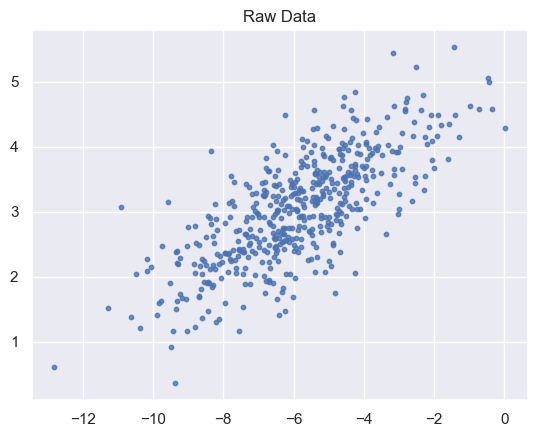

In [41]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 500
C = np.array([[0.1, 0.6], [2., .6]])
X = np.random.randn(n_samples, 2) @ C + np.array([-6, 3])
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Raw Data")
plt.show()

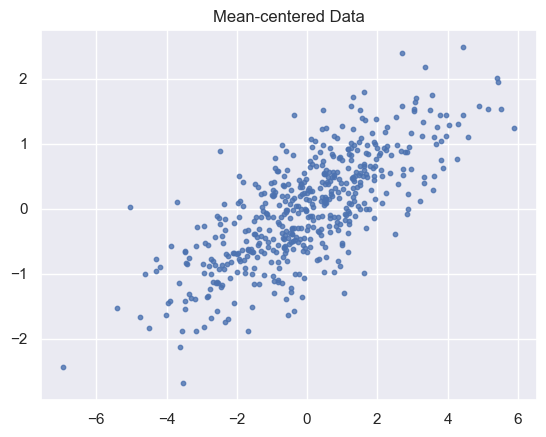

In [42]:
X = X - np.mean(X, axis=0)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
plt.title("Mean-centered Data")
plt.show()

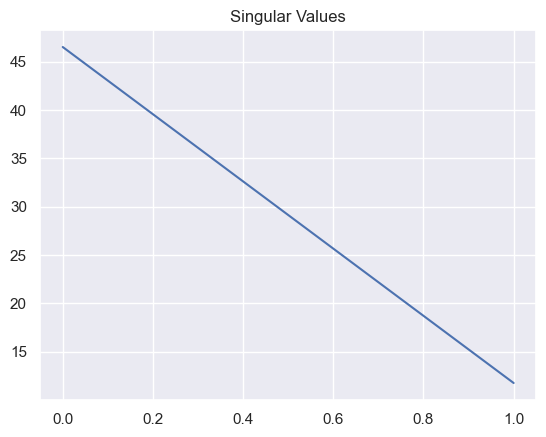

In [43]:
u,s,vt=np.linalg.svd(X, full_matrices=False)
plt.plot(s) # only 2 singular values
plt.title("Singular Values")
plt.show()

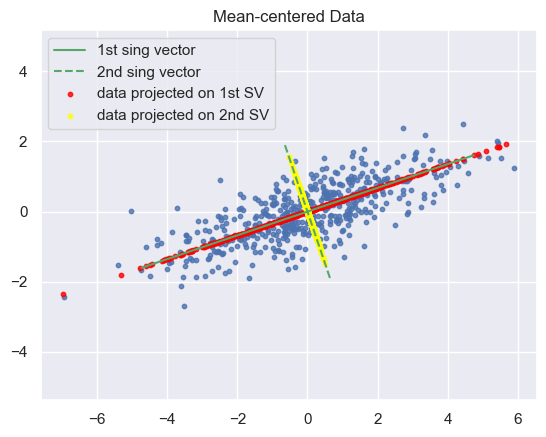

In [44]:
scopy0 = s.copy()
scopy1 = s.copy()
scopy0[1:] = 0.0
scopy1[:1] = 0.0
approx0 = u.dot(np.diag(scopy0)).dot(vt)
approx1 = u.dot(np.diag(scopy1)).dot(vt)
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.8)
sv1 = np.array([[-5],[5]]) @ vt[[0],:]
sv2 = np.array([[-2],[2]]) @ vt[[1],:]
plt.plot(sv1[:,0], sv1[:,1], 'g-', label="1st sing vector")
plt.plot(sv2[:,0], sv2[:,1], 'g--', label="2nd sing vector")
plt.scatter(approx0[:, 0] , approx0[:, 1], s=10, alpha=0.8, color="red", label="data projected on 1st SV")
plt.scatter(approx1[:, 0] , approx1[:, 1], s=10, alpha=0.8, color="yellow", label="data projected on 2nd SV")
plt.axis('equal')
plt.legend()
plt.title("Mean-centered Data")
plt.show()


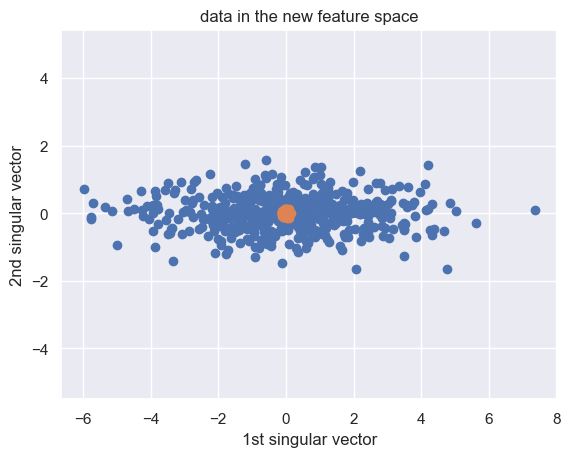

In [45]:
# show ouput from svd is the same
orthonormal_X = u
shifted_X = u.dot(np.diag(s))
plt.axis('equal')
plt.scatter(shifted_X[:,0], shifted_X[:,1])
plt.scatter(orthonormal_X[:,0], orthonormal_X[:,1])
plt.xlabel("1st singular vector")
plt.ylabel("2nd singular vector")
plt.title("data in the new feature space")
plt.show()

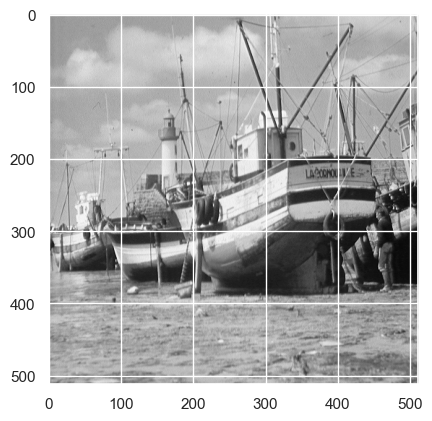

In [46]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

boat = np.loadtxt('./boat.dat')
plt.figure()
plt.imshow(boat, cmap = cm.Greys_r)

a) Plot the singular values of the image above (note: a gray scale image is just a matrix).

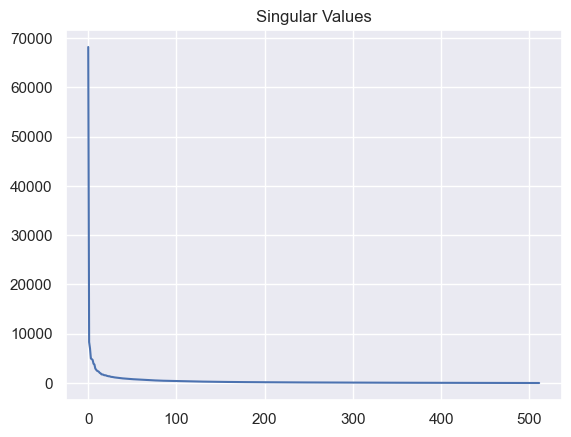

In [47]:
u,s,vt=np.linalg.svd(boat,full_matrices=False)
plt.figure()
plt.plot(s)
plt.title("Singular Values")
plt.show()

Notice you can get the image back by multiplying the matrices back together:

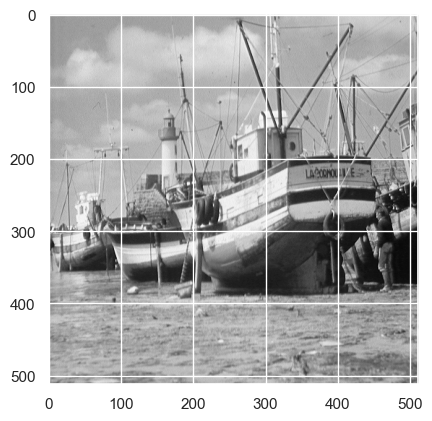

In [48]:
boat_copy = u.dot(np.diag(s)).dot(vt)
plt.figure()
plt.imshow(boat_copy, cmap = cm.Greys_r)

b) Create a new matrix `scopy` which is a copy of `s` with all but the first singular value set to 0.

In [49]:
scopy = s.copy()
scopy[1:] = 0.0

c) Create an approximation of the boat image by multiplying `u`, `scopy`, and `v` transpose. Plot them side by side.

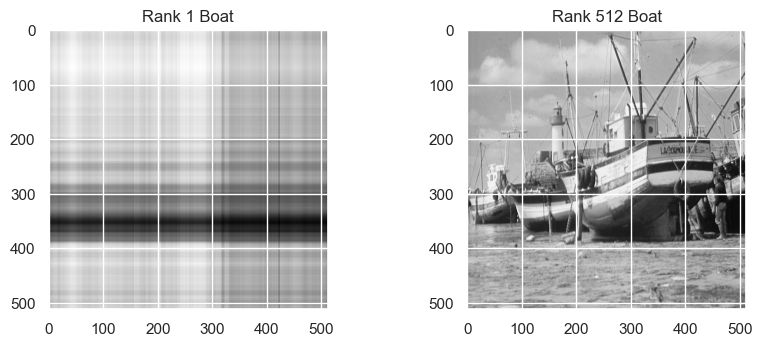

In [50]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 1 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

d) Repeat c) with 40 singular values instead of just 1.

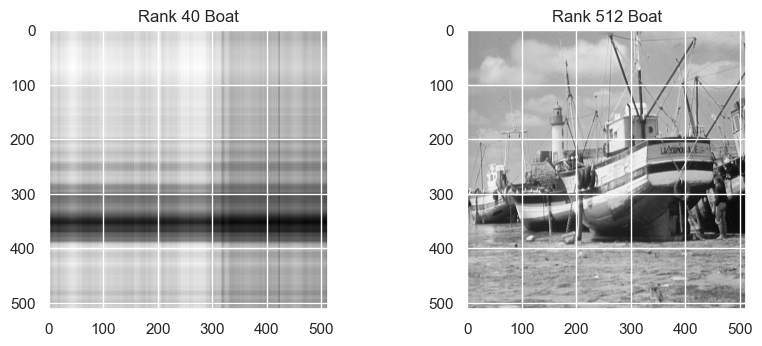

In [51]:
boat_app = u.dot(np.diag(scopy)).dot(vt)

scopy = s.copy()
scopy[40:] = 0.0
plt.figure(figsize=(9,6))
plt.subplot(1,2,1)
plt.imshow(boat_app, cmap = cm.Greys_r)
plt.title('Rank 40 Boat')
plt.subplot(1,2,2)
plt.imshow(boat, cmap = cm.Greys_r)
plt.title('Rank 512 Boat')
_ = plt.subplots_adjust(wspace=0.5)
plt.show()

### Why you should care

a) By using an approximation of the data, you can improve the performance of classification tasks since:

1. there is less noise interfering with classification
2. no relationship between features after SVD
3. the algorithm is sped up when reducing the dimension of the dataset

Below is some code to perform facial recognition on a dataset. Notice that, applied blindly, it does not perform well:

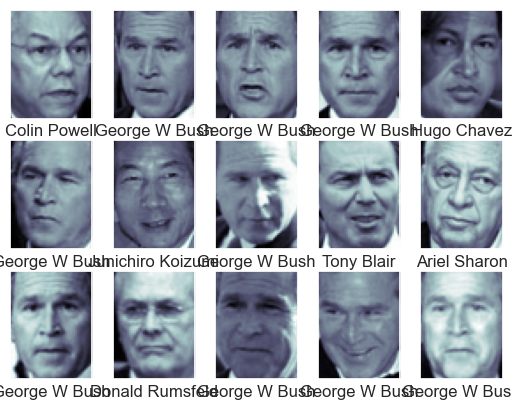

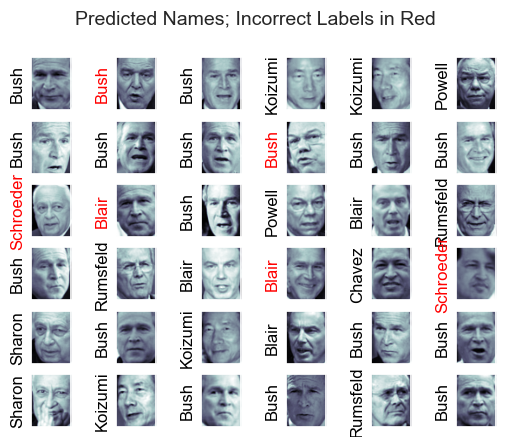

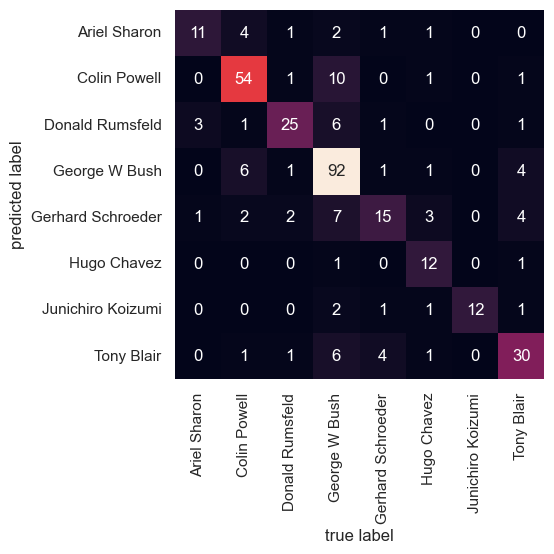

Accuracy =  0.744807121661721


In [52]:
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

sns.set()

# Get face data
faces = fetch_lfw_people(min_faces_per_person=60)

# plot face data
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])
plt.show()

# split train test set
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

# blindly fit svm
svc = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)

# fit model
model = svc.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))

By performing SVD before applying the classification tool, we can reduce the dimension of the dataset.

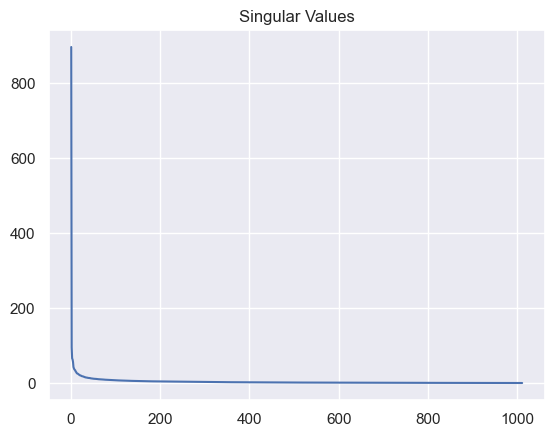

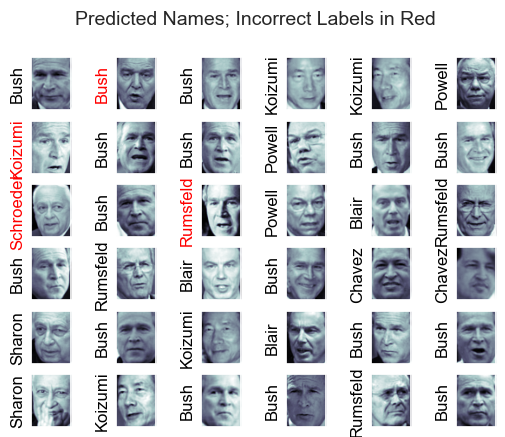

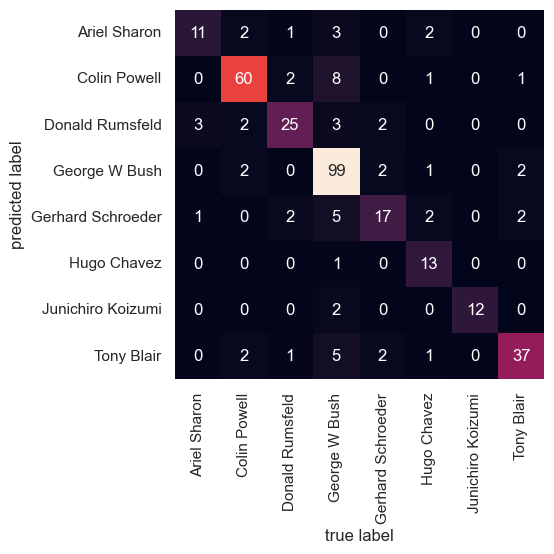

Accuracy =  0.8130563798219584


In [53]:
# look at singular values
_, s, _ = np.linalg.svd(Xtrain, full_matrices=False)
plt.plot(range(1,len(s)+1),s)
plt.title("Singular Values")
plt.show()

# extract principal components
pca = PCA(n_components=75, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced', C=5, gamma=0.001)
svcpca = make_pipeline(pca, svc)
model = svcpca.fit(Xtrain, ytrain)
yfit = model.predict(Xtest)

fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

print("Accuracy = ", accuracy_score(ytest, yfit))

Similar to finding k in K-means, we're trying to find the point of diminishing returns when picking the number of singular vectors (also called principal components).

b) SVD can be used for anomaly detection.

The data below consists of the number of 'Likes' during a six month period, for each of 9000 users across the 210 content categories that Facebook assigns to pages.

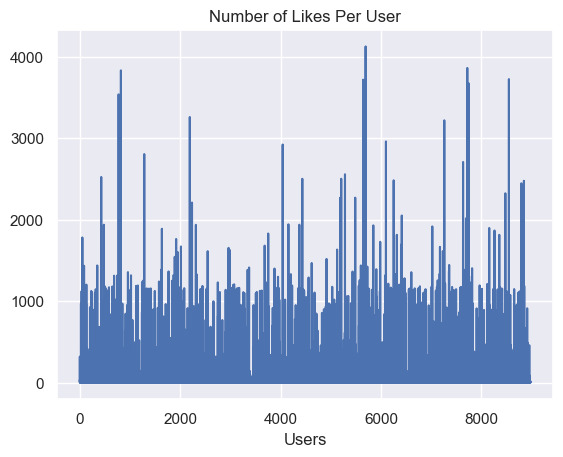

In [55]:
data = np.loadtxt('spatial_data.txt')

FBSpatial = data[:,1:]
FBSnorm = np.linalg.norm(FBSpatial,axis=1,ord=1)
plt.plot(FBSnorm)
plt.title('Number of Likes Per User')
_ = plt.xlabel('Users')
plt.show()

How users distribute likes across categories follows a general pattern that most users follow. This behavior can be captured using few singular vectors. And anomalous users can be easily identified.

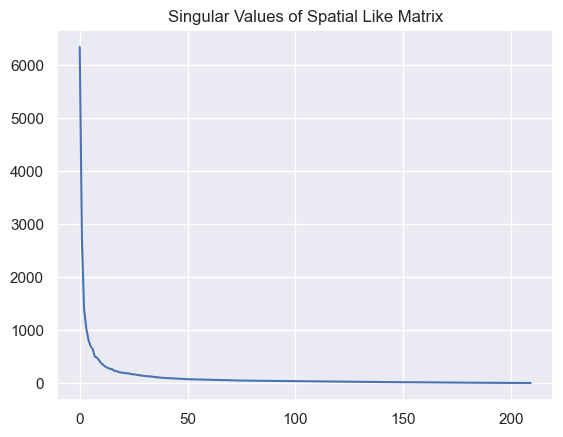

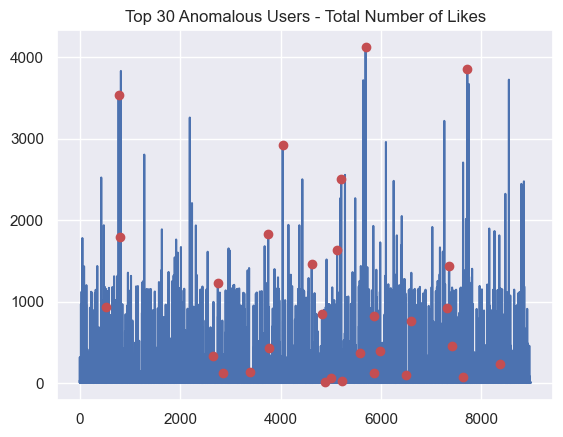

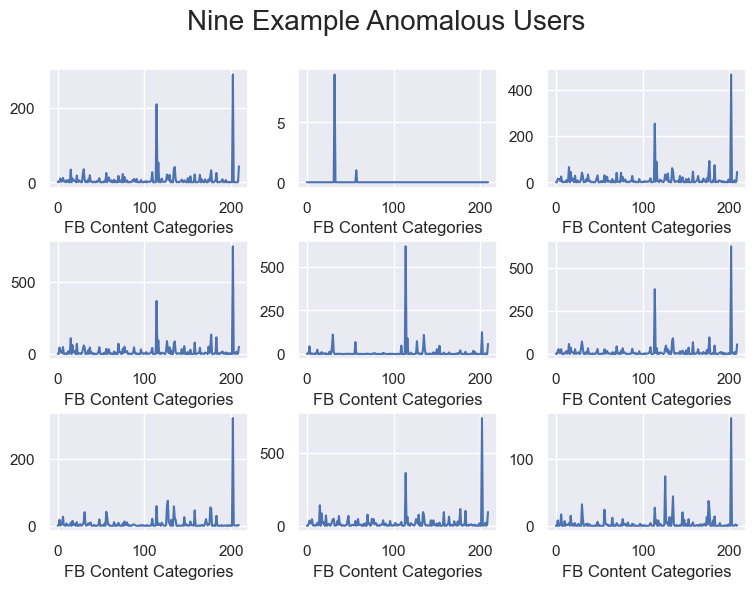

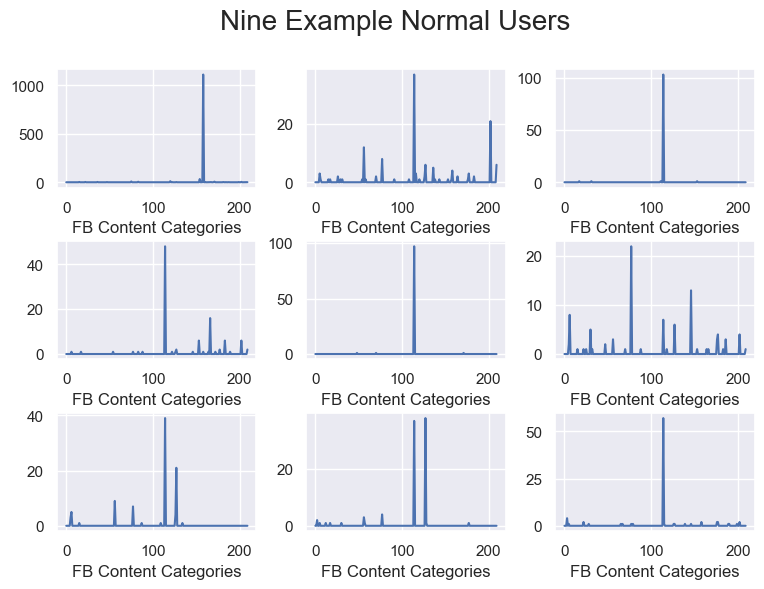

In [56]:
u,s,vt = np.linalg.svd(FBSpatial,full_matrices=False)
plt.plot(s)
_ = plt.title('Singular Values of Spatial Like Matrix')
plt.show()

RANK = 100
scopy = s.copy()
scopy[RANK:] = 0.
N = u @ np.diag(scopy) @ vt
O = FBSpatial - N
Onorm = np.linalg.norm(O, axis=1)
anomSet = np.argsort(Onorm)[-30:]
# plt.plot(Onorm)
# plt.plot(anomSet, Onorm[anomSet],'ro')
# _ = plt.title('Norm of Residual (rows of O)')
# plt.show()

plt.plot(FBSnorm)
plt.plot(anomSet, FBSnorm[anomSet],'ro')
_ = plt.title('Top 30 Anomalous Users - Total Number of Likes')
plt.show()

# anomalous users
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(FBSpatial[anomSet[i-1],:])
    plt.xlabel('FB Content Categories')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
_ = plt.suptitle('Nine Example Anomalous Users',size=20)
plt.show()

# normal users
set = np.argsort(Onorm)[0:7000]
# that have high overall volume
max = np.argsort(FBSnorm[set])[::-1]
plt.figure(figsize=(9,6))
for i in range(1,10):
    ax = plt.subplot(3,3,i)
    plt.plot(FBSpatial[set[max[i-1]],:])
    plt.xlabel('FB Content Categories')
plt.subplots_adjust(wspace=0.25,hspace=0.45)
_ = plt.suptitle('Nine Example Normal Users',size=20)
plt.show()

## Challenge Problem

a) Fetch the "mnist_784" data. Pick an image of a digit at random and plot it.

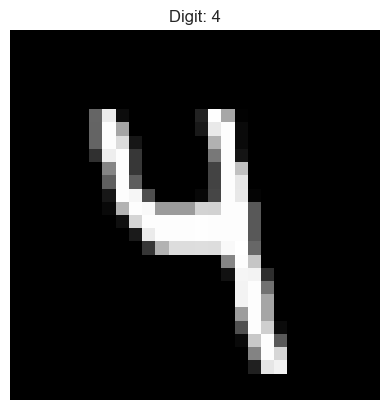

In [59]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# Randomly select an index
random_index = np.random.randint(0, len(X))

# Retrieve the image data
random_image = X[random_index]

# Reshape the image data into a 28x28 matrix
image_matrix = random_image.reshape(28, 28)

# Plot the image
plt.imshow(image_matrix, cmap='gray')
plt.title(f"Digit: {y[random_index]}")
plt.axis('off')
plt.show()

b) Plot its singular value plot.

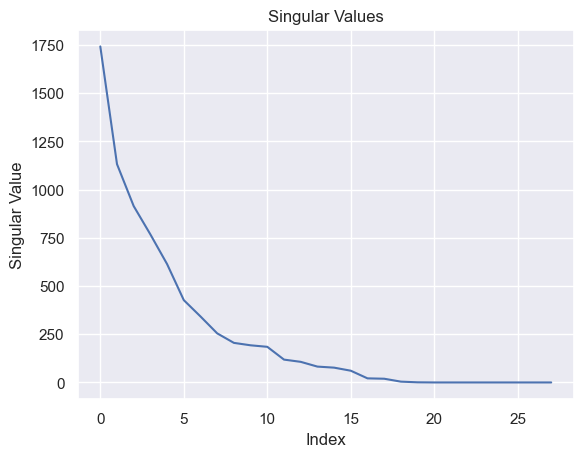

In [60]:
# Fetch the MNIST dataset
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# Randomly select an index
random_index = np.random.randint(0, len(X))

# Retrieve the image data
random_image = X[random_index]

# Reshape the image data into a 28x28 matrix
image_matrix = random_image.reshape(28, 28)

# Perform Singular Value Decomposition (SVD)
u, s, vt = np.linalg.svd(image_matrix, full_matrices=False)

# Plot the singular values
plt.figure()
plt.plot(s)
plt.title("Singular Values")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.show()

c) By setting some singular values to 0, plot the approximation of the image next to the original image

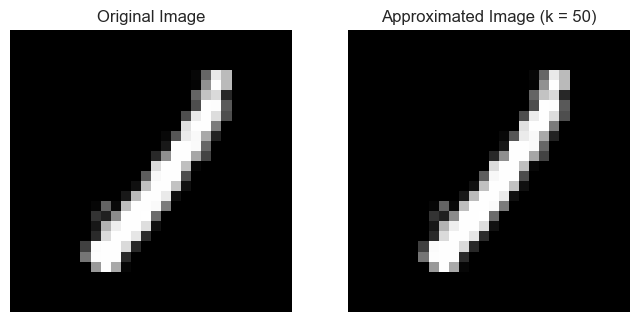

In [61]:
# Fetch the MNIST dataset
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# Randomly select an index
random_index = np.random.randint(0, len(X))

# Retrieve the image data
random_image = X[random_index]

# Reshape the image data into a 28x28 matrix
image_matrix = random_image.reshape(28, 28)

# Perform Singular Value Decomposition (SVD)
u, s, vt = np.linalg.svd(image_matrix, full_matrices=False)

# Truncate singular values by setting some of them to zero
k = 50  # Number of singular values to keep
s_truncated = np.zeros_like(s)
s_truncated[:k] = s[:k]

# Reconstruct the image using the truncated SVD
image_approximation = np.dot(u[:, :k], np.dot(np.diag(s_truncated), vt[:k, :]))

# Plot original and approximated images side by side
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image_matrix, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Approximated image
plt.subplot(1, 2, 2)
plt.imshow(image_approximation, cmap='gray')
plt.title("Approximated Image (k = 50)")
plt.axis('off')

plt.show()

d) Consider the entire dataset as a matrix. Perform SVD and explain why / how you chose a particular rank. Note: you may not be able to run this on the entire dataset in a reasonable amount of time so you may take a small random sample for this and the following questions.

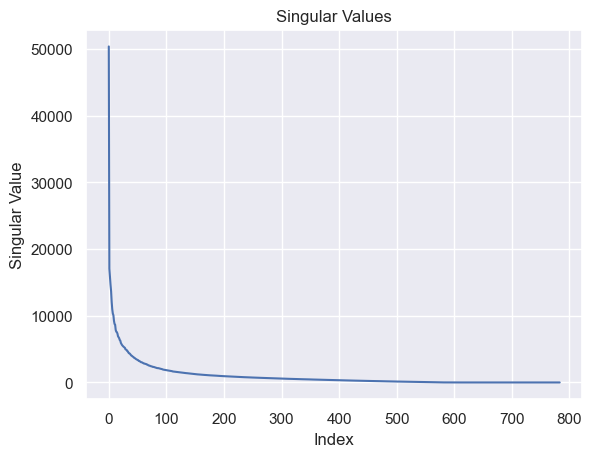

In [63]:
import numpy as np
from sklearn.datasets import fetch_openml

# Fetch a random sample of the MNIST dataset
X_sample, y_sample = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False, data_home='./mnist')

# Randomly select a subset of the dataset
sample_indices = np.random.choice(len(X_sample), size=1000, replace=False)
X_sample = X_sample[sample_indices]

# Perform Singular Value Decomposition (SVD)
u, s, vt = np.linalg.svd(X_sample, full_matrices=False)

# Choose an appropriate rank
# One common method is to examine the decay of the singular values
# and select the rank where the singular values drop off sharply
plt.plot(s)
plt.title("Singular Values")
plt.xlabel("Index")
plt.ylabel("Singular Value")
plt.show()

e) Using Kmeans on this new dataset, cluster the images from d) using 10 clusters and plot the centroid of each cluster. Note: the centroids should be represented as images.

/Users/gracevansciver/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


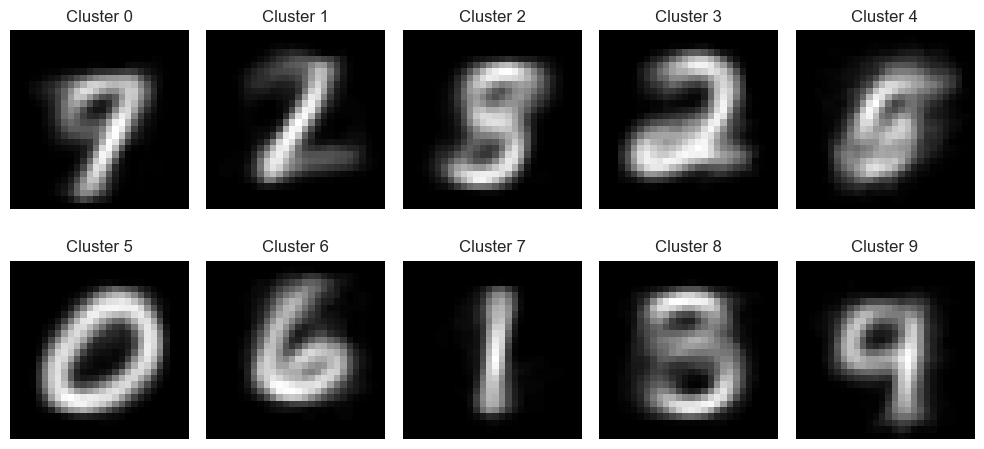

In [64]:
from sklearn.cluster import KMeans

# Fetch a random sample of the MNIST dataset
X_sample, y_sample = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False, data_home='./mnist')

# Randomly select a subset of the dataset
sample_indices = np.random.choice(len(X_sample), size=1000, replace=False)
X_sample = X_sample[sample_indices]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_sample)

# Plot the centroids as images
centroids = kmeans.cluster_centers_.reshape(-1, 28, 28)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroids[i], cmap='gray')
    plt.title(f"Cluster {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

f) Repeat e) on the original dataset (if you used a subset of the dataset, keep using that same subset). Comment on any differences (or lack thereof) you observe between the centroids created here vs the ones you created in e).

/Users/gracevansciver/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Using the same subset of the dataset.


/Users/gracevansciver/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


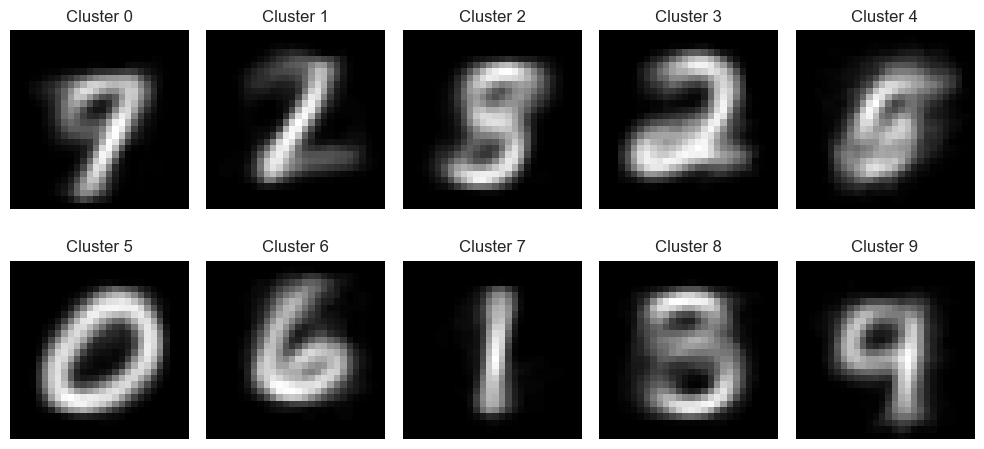

In [65]:
# Fetch the MNIST dataset
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False, data_home='./mnist')

# If a subset was used in part (e), continue using the same subset
if 'X_sample' in locals():
    print("Using the same subset of the dataset.")
else:
    # Randomly select a subset of the dataset
    sample_indices = np.random.choice(len(X), size=1000, replace=False)
    X_sample = X[sample_indices]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X_sample)

# Plot the centroids as images
centroids = kmeans.cluster_centers_.reshape(-1, 28, 28)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centroids[i], cmap='gray')
    plt.title(f"Cluster {i}")
    plt.axis('off')

plt.tight_layout()
plt.show()

g) Create a matrix (let's call it `O`) that is the difference between the original dataset and the rank-10 approximation of the dataset. i.e. if the original dataset is `A` and the rank-10 approximation is `B`, then `O = A - B`

In [68]:
# Fetch the MNIST dataset
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False, data_home='./mnist')

# Perform Singular Value Decomposition (SVD)
u, s, vt = np.linalg.svd(X, full_matrices=False)

# Retain only the first 10 singular values and corresponding singular vectors
k = 10
s_truncated = np.diag(s[:k])
u_truncated = u[:, :k]
vt_truncated = vt[:k, :]

# Reconstruct the rank-10 approximation matrix
X_approximation = np.dot(u_truncated, np.dot(s_truncated, vt_truncated))

# Calculate the difference matrix O
O = X - X_approximation

h) The largest (using euclidean distance from the origin) rows of the matrix `O` could be considered anomalous data points. Briefly explain why. Plot the 10 images (by finding them in the original dataset) responsible for the 10 largest rows of that matrix `O`.

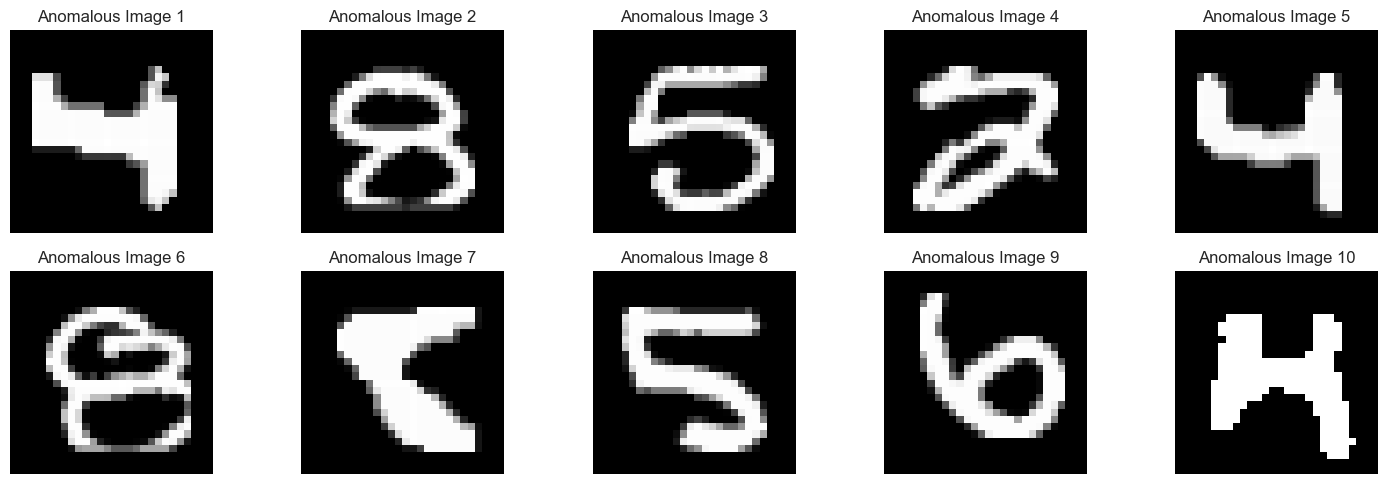

In [67]:
# Fetch the MNIST dataset
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False, data_home='./mnist')

# Calculate Euclidean distance from the origin for each row of matrix O
distances = np.linalg.norm(O, axis=1)

# Find the indices of the 10 largest rows
largest_indices = np.argsort(distances)[-10:]

# Plot the 10 images responsible for the largest rows of matrix O
plt.figure(figsize=(15, 5))
for i, index in enumerate(largest_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[index].reshape(28, 28), cmap='gray')
    plt.title(f"Anomalous Image {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

These data points can be considered anomalous because they have the largest weight of contribution to the difference between the original dataset and its approximation. These data points are the most poorly represented by the low-rank approximation and may deviate significantly from the general structure of the dataset.